<a href="https://colab.research.google.com/github/Midhilesh4890/Pytorch/blob/main/Pytorch_Feed_Forward_Neural_Network_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Necessary Libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
#Hyperparameters
input_size = 784 
hidden_size = 100
num_classes = 10 #--> Output size
num_epochs = 2
batch_size = 100
learning_rate = 0.01

In [3]:
#MNIST Dataset
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [4]:
examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape,labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


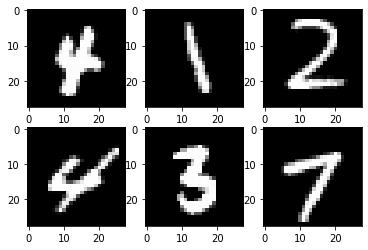

In [5]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')
plt.show()

In [6]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(NeuralNet,self).__init__()
        self.l1 = nn.Linear(input_size,hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size,num_classes)
    
    def forward(self,x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

In [7]:
model = NeuralNet(input_size,hidden_size,num_classes)

In [8]:
#Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [9]:
#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i,(images,labels) in enumerate(train_loader):
        images = images.reshape(-1,784)
        labels = labels
        #forward pass
        outputs = model(images)
        loss = criterion(outputs,labels)
        #backwards
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1}/{num_epochs} , step {i+1}/{n_total_steps},loss = {loss.item():.4f}')

epoch 1/2 , step 100/600,loss = 0.2810
epoch 1/2 , step 200/600,loss = 0.0892
epoch 1/2 , step 300/600,loss = 0.1555
epoch 1/2 , step 400/600,loss = 0.1557
epoch 1/2 , step 500/600,loss = 0.1688
epoch 1/2 , step 600/600,loss = 0.2160
epoch 2/2 , step 100/600,loss = 0.1609
epoch 2/2 , step 200/600,loss = 0.0292
epoch 2/2 , step 300/600,loss = 0.0673
epoch 2/2 , step 400/600,loss = 0.2291
epoch 2/2 , step 500/600,loss = 0.1491
epoch 2/2 , step 600/600,loss = 0.0380


In [10]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images , labels in test_loader:
        images = images.reshape(-1,784)
        labels = labels
        outputs = model(images)
        #value,index
        _, predictions = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()
    acc = 100 * n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 96.52
